# **<center> Customer Segment Analysis**
## **<center> Prithwijit Ghosh**

**Customer segment analysis** is one of the key technology that can be applied to the customers to separate them into a number of **homogeneous group**. This analysis is more important to the business analyst team of any marketting company to sell their product with a greater amount. 










> For example let us see the fact in our daily life basis. Let someone goes to **youtube** and plays the shorts. At first **youtube-shorts** are random then after a few time the shorts are not very random and after few days the shorts can be said to be deterministic because then the videos are coming form the domain which the user likes the most. By looking this fact it can be very ashtonising but the logic is very simple. When a video is coming from the doamin that the user not like so much then the user usually skips those videos and those which are coming user's ineterst,he/she may play it 2-3 times. This information is strored in the **Google's database**. So finally Google uses some sort of **clustering algorithm** to separate the users and then shows only those videos in which the users are more interested.

---



The same thing happens in the customer segmentation analysis where companies can **group the customer** based on their current behaviours and finally companies offer those groups that products which **they acctually want**.


## **Import Libraries**

Let now import the important libraries that are releavant for our further analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score

## **Task 1: Data Loading & Exploration**

Let load our data which is actually a customer segmantation data and look into the data in greater datails.

In [ ]:
D = pd.DataFrame(pd.read_csv("/content/Customers.csv"))
D.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In the above data the columns provide the following informations -- 
> **CustomerID** $→$ Identification number of the customer<br>
**Genre** $→$ Gender of the customer<br>
**Age** $→$ Age of the customer <br>
**Annual Income (k\$)** $→$ Annual Income of the customer in dollars<br>
**Spending Score (1-100)** $→$ Scored value of spendings of customers

Since the **Age**, **Customer ID**,**Genre** are not the important features so we will drop them and our final features are ***Annual Income (k$)*** and ***Spending Score(1- 100)***.

In [ ]:
D = D.iloc[:,3:5]
D.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Let us check whether their exists any null values in any of the columns 

In [ ]:

np.sum(D.isnull())

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional 

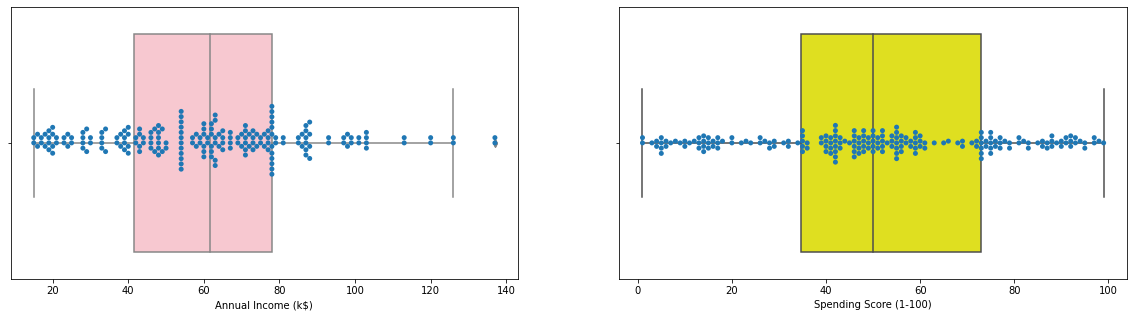

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(D["Annual Income (k$)"],orient = 'v',color = "pink")
sns.swarmplot(D["Annual Income (k$)"])
plt.subplot(1,2,2)
sns.boxplot(D["Spending Score (1-100)"],orient = 'v',color = "yellow")
sns.swarmplot(D["Spending Score (1-100)"])
plt.show()

So we see that the missing values as well as the outliers are not present in our dataset, their are no need to do any data cleansing procedure and we can safely move further into our journey.

## **Task 2: Create Scatter Plot between Annual Income & Spending Score**

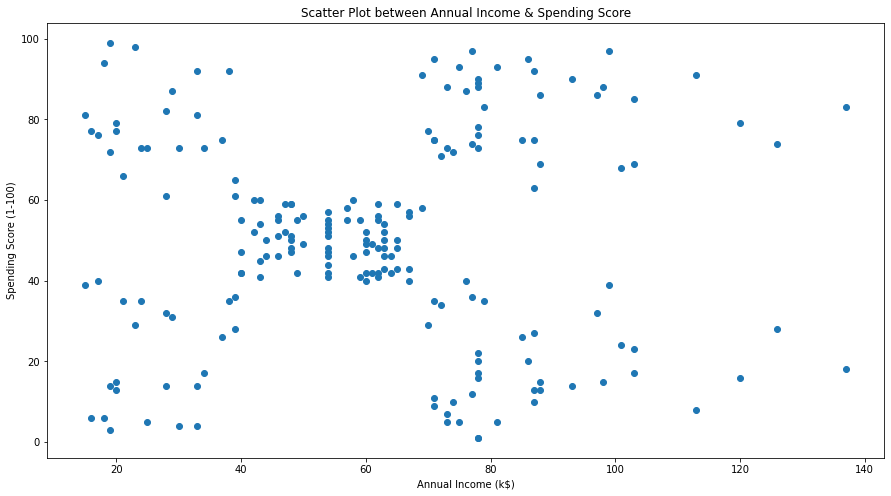

In [ ]:
plt.figure(figsize = (15,8))
plt.scatter(D["Annual Income (k$)"],D["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot between Annual Income & Spending Score")
plt.show()

Since there are only two columns in our dataset and the finally we want to do the clustering algorithm to find the clusters, it is always better to plot the scatterplot of this two variables to see any within homogeneity features of these two variables simutaneously.

Here in the above plot nearly five clusters are clearly visible four are in the corner position and one in the middle. let use see what is the actual numer of clusters for this data.

## **Task 3: Perform Scaling using MinMaxScaler**

Now the range of the data is clearly not the same for this two variables, we have to preprocess the data into the same range. 
Here we use the **MinMaxScaler** which is simply<br><br> $$Transformed\ Data = \frac{Primary\ Data}{Max(Primary\ Data) - Min(Primary\ Data)}$$<br>

So the minimum value for each column is 0 and the maximum value is 1,so all the data must lie in the same range **[0,1].**

In [ ]:
Scaler = MinMaxScaler()
D = Scaler.fit_transform(D)
D = pd.DataFrame(D)
D.columns = ["Annual Income (k$)","Spending Score (1-100)"]
D.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


Finally we will see whether there is any relationship between these two varaibles ,or more statistically are these two features are correlated or not. For this we will use the **scatterplot** with the **regression line**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


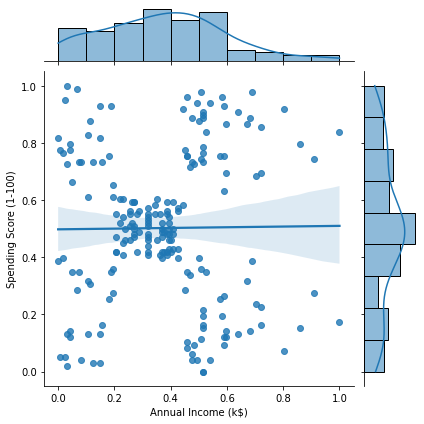

In [ ]:
sns.jointplot("Annual Income (k$)", "Spending Score (1-100)",data = D,kind = "reg")
plt.show()

From the above plot we see that there are statistically no realationship between the variables the they are actually **uncorrelated variables**.

## **Model Building**

Let us dive into the model fitting procedure. Here we will use --

1.   **K- Means Clustering**
2.  **Hierarchical Clustering(Agglomerative)**



## **Task 4: Develop Clusters using KMeans**

We first create a function that gives us the output of the **inertia** of the **number of clusters**. So if we choose the input value of the function is 5, then the function gives us a vector whose componentwise values are the inertia corresponding to 1,2,3,4,5 clusters respectively.

In [ ]:
def elbow(n):
  Inertia = []
  for i in np.arange(1,n):
    Model = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    Model.fit(D)
    Inertia.append(Model.inertia_)
  return Inertia
elbow(10)

[23.04072032603991,
 13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.6488109982190347,
 2.281629082674579,
 1.8738750959041317]

Now we have to plot the inertia in the y-axis and the value of the number of clusters in the x-axis. Then the line plot will bend at a point sharply and that is the perfect number of clusters we have to choose.

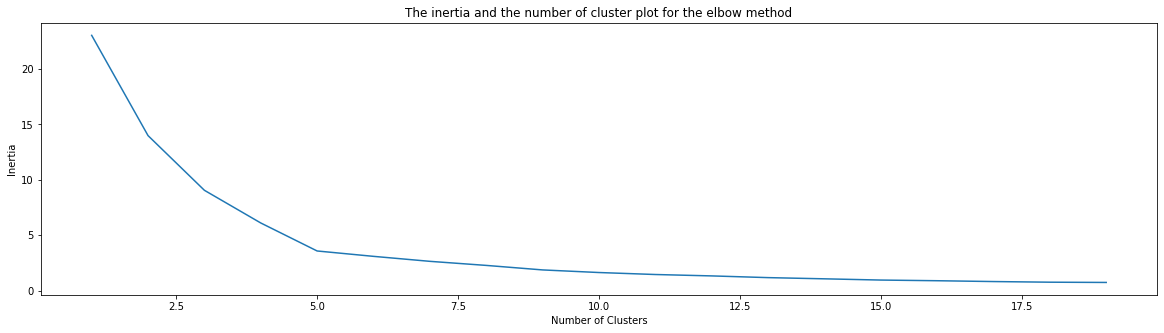

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(range(1,20),elbow(20))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("The inertia and the number of cluster plot for the elbow method")
plt.show()

So from the above plot we see that the curve bends sharply at**x = 5.0**, implies that the **optimal number of clusters** is exactly equal to 5

In [ ]:
Model = KMeans(n_clusters = 5,init = "k-means++",random_state = 0)

In [ ]:
Predict = Model.fit_predict(D)
Predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

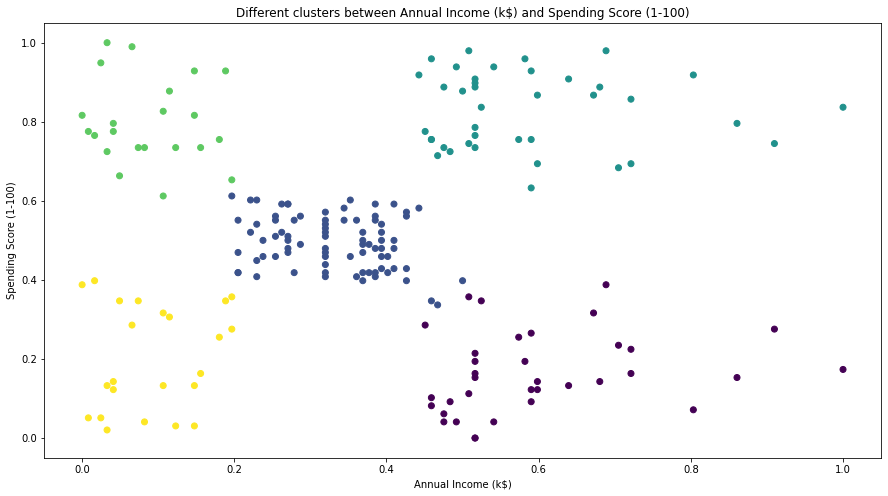

In [ ]:
plt.figure(figsize = (15,8))
plt.scatter(D["Annual Income (k$)"],D["Spending Score (1-100)"],c = Predict)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Different clusters between Annual Income (k$) and Spending Score (1-100)")
plt.show()


The above plot shows the different number of clusters by which the whole dataset is divided into different groups. And that also matches wich our intuision.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


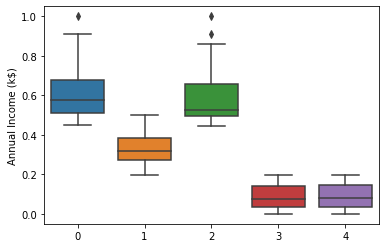

In [ ]:
sns.boxplot(Predict,D["Annual Income (k$)"])
plt.show()

The above boxplots shows the mean levels and the varaition of different cluster lavels. Now chronologically the first **three clusters** are totally different whereas the last **two clasters** have mean and the variance almost nearly equal. So we can say that with respect to **Annual Income (k$)**, we can distinguish three groups easily but the **last two groups are not totally separable**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


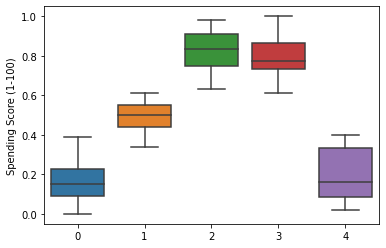

In [ ]:
sns.boxplot(Predict,D["Spending Score (1-100)"])
plt.show()

With respect to the **Spending Score(1-100)**, the **first three clusters** have mean and the variance that are totally distinguishable but the fourth cluster have mean almost equal to the third cluster but the varaince is quite smaller than the fourth one. Finally the **last cluster and the first cluster** are almost equal by their mean but the last one has a greater variance. So here all the **clusters are claerly separable**.

Joining these two ideas the final scatterplot shows that the five clusters are easily distinguishable and the corresponding plot was shown above.

## **Silhouette Coefficient**

**Silhouette Score** gives the idea that -- **are the number of clusters chosen above are good or not?**

It is actually a coefficient that lies between -1 and 1. So the three cases are as follows --

*   **-1** $⟶$ The data are assigned to the **wrong cluster**
*    **0** $⟶$ The mean of the different clusters are **not** **totally separable**.
*    **1** $⟶$ The class means are **totally separable** or in other words data are assigned to the correct clusters

Based on this criterion now will find the **Silhouette Score** for our problem



In [ ]:
Accuracy = silhouette_score(D,Predict)
Accuracy

0.5594854531227246

The Silhoette Score is 0.5595, So the clustering is good but the clusters are not completely separable....as expected by the real life dataset.

## **Developing Hierarchical Clustering Using Agglomerative Approach**

Here we measure the **distance of nearest points**,then assigned them to the same cluster. After that we do the same procedure again and again until all the points are not assigned to a **single cluster**. Then we see the corresponding distances by the **Dendrogram**, where the vertical stands are the distances between the points or the clusters. Finally we will choose the **optimal number of clusters** where one **vertical distance is largest** in the Dendrogram. Then we draw a horizontal line on the largest vertical line, the number of vertical line that are intersected by the horizontal line, is the **optimal number of clusters**.

In [ ]:
Data = list(zip(list(D["Annual Income (k$)"]),list(D["Spending Score (1-100)"])))

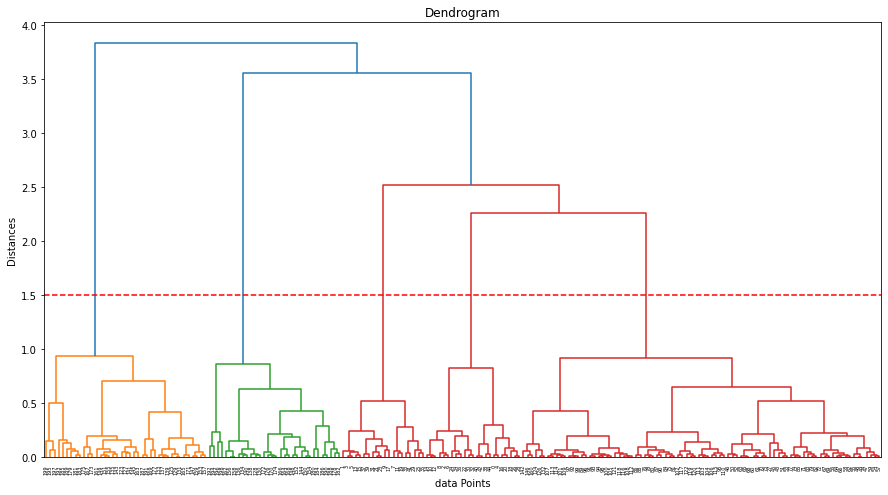

In [ ]:
plt.figure(figsize = (15,8))
linkage_data = linkage(Data,method = "ward",metric = "euclidean")
dendrogram(linkage_data)
plt.axhline(y =1.5,color = "red", linestyle = "--")
plt.xlabel("data Points")
plt.ylabel("Distances")
plt.title("Dendrogram")
plt.show()

By the above Dendrogram we see that the **optimal number** of clusters is **5** which is **exactly equal** to the number of clusters in **K-Means** method.

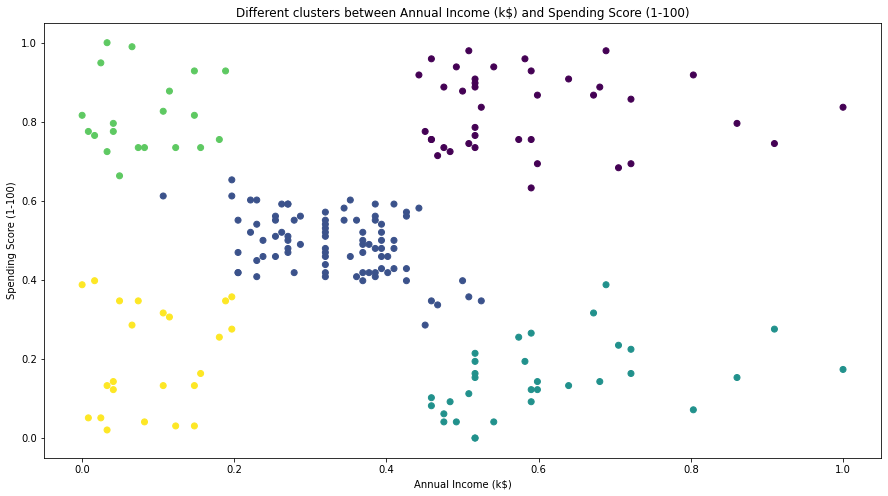

In [ ]:
plt.figure(figsize = (15,8))
Cluster = AgglomerativeClustering(n_clusters = 5,affinity = "euclidean",linkage = "ward")
H_predict = Cluster.fit_predict(Data)
plt.scatter(D["Annual Income (k$)"],D["Spending Score (1-100)"],c = H_predict)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Different clusters between Annual Income (k$) and Spending Score (1-100)")
plt.show()

The plot also looks similar to the plot as given by the K-Means clustering method. So the important question lies on the fact that which of the two methods we have to choose???

Let's look into the Silhouette Score --

In [ ]:
Accuracy = silhouette_score(Data,H_predict)
Accuracy

0.5582698727196419

But the **Silhouette Score** is also **nearly equal** to the K-Mean method. But the K-Means have slightly greater score. So, we choose the **K-Means** algorithm as the **final method** for our clustering problem.

## **Conclusion**

Based on the above calculation and theory we can conclude the following things --


*   **Yellow Group** $⟶$ It has the lower income and also has the lower spending but has fewer number of people
*   **Light Green** $⟶$ It has the lower income but has heavy spending and also has fewere number of people
*   **Dark Green** $⟶$ It has the heavy income and also has heavy expenses and larger number of people but they are more dipersive
*   **Violet** $⟶$ It has the heavy income but they are budget friendl and they also contain greater number of people with larger variation
*   **Blue** $⟶$ It is moderate with respect to both the variables. It has the highest number of data points and also their deivation is much smaller than the othres. 

**So, mainly the targeting group of any company will be the blue one. Because the number of candidates are greater and also the spending score is quite high for the Blue group. And all other groups are less important than the blue one.**

